In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [8]:
student=pd.read_csv("C://Users//Rahul//Desktop//Sparks//student_scores - student_scores.csv")
student.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


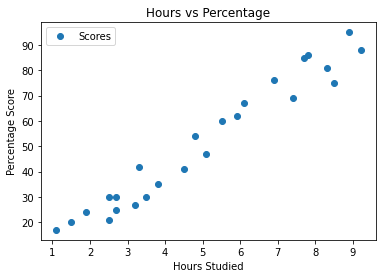

In [9]:
student.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [17]:
X = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
lm=regressor.fit(X_train, y_train) 
lm

LinearRegression()

In [22]:
print(lm.intercept_)
print(lm.coef_)

2.018160041434683
[9.91065648]


In [23]:
2.018160041434683+9.91065648*8

81.30341188143468

In [25]:
X_new = pd.DataFrame({'Hours': [8]})
X_new.head()

,Hours
0,8


In [26]:
lm.predict(X_new)

array([81.30341189])

In [28]:
X_new = pd.DataFrame({'Hours': [student.Hours.min(), student.Hours.max()]})
X_new.head()

,Hours
0,1.1
1,9.2


In [29]:
preds = lm.predict(X_new)
preds

array([12.91988217, 93.19619966])

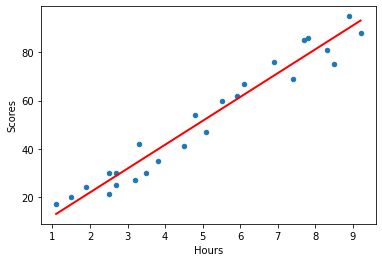

In [33]:
student.plot(kind='scatter', x='Hours', y='Scores')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [35]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Scores ~ Hours', data=student).fit()
lm.conf_int()

,0,1
Intercept,-2.753470,7.720817
Hours,8.838823,10.712784


In [36]:
lm.pvalues

Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64

In [37]:
lm.rsquared

0.9529481969048356

In [42]:
Accuracy=(lm.rsquared*100)
print("Accuracy of model is",Accuracy,"%")

Accuracy of model is 95.29481969048355 %
